# ЛР №4 Проведение исследований со случайным лесом
Для классификации был выбрал датасет '[Mushroom Dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset)' \
Задачей было классифицировать съедобные и несъедобные грибы  \
Для регрессии был выбран датасет '[Gold Price Regression](https://www.kaggle.com/datasets/franciscogcc/financial-data)'\
Задачей было предсказывать стоимость золота.

# Случайный лес

Загружаем датасет и смотрим его верхние строки

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../mushroom_cleaned.csv"
data_class = pd.read_csv(file_path)
data_class.head()



,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


То же самое для второго датасета 

In [2]:
file_path2 = "../financial_regression.csv"
data_regr = pd.read_csv(file_path2)
data_regr.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


Кодируем категориальные фичи и разделим фичи на целевые и не целевые 

In [3]:
encoded_data = pd.get_dummies(data_class, columns=["cap-shape", "gill-attachment", "gill-color", "stem-color"])

label_encoder = LabelEncoder()
for column in ["cap-shape", "gill-attachment", "gill-color", "stem-color"]:
    data_class[column] = label_encoder.fit_transform(data_class[column])

# разделение фич на целевую и не целевую
X = data_class.drop(columns=["class"])
y = data_class["class"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

Кодируем фичи для датасета регрессии

In [4]:
from sklearn.model_selection import train_test_split

data_regr = data_regr.dropna(subset=['sp500 close', 'gold close'])
data_regr = data_regr.drop(['us_rates_%', 'CPI', 'date', 'GDP'], axis=1)
data_regr = data_regr.dropna()


X = data_regr.drop('gold close', axis=1)
y = data_regr['gold close']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

Обучение моделей случайного леса регрессора и классификатора. В качестве метрики качества будем использовать accuracy для классификатора и MSE, R2 для регрессора.

In [5]:
model_rf_regr = RandomForestRegressor(random_state=42)
model_rf_regr.fit(X_train_regr, y_train_regr)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_class, y_train_class)


RandomForestClassifier(random_state=42)

Посмотрим на результаты обучения:

In [6]:
predicted_class = model_rf.predict(X_test_class)
print("accuracy: ", metrics.accuracy_score(y_test_class, predicted_class))

accuracy:  0.9909318034607199


Получаем достаточно высокие значения accuracy - 0.9909318034607199

In [7]:
predicted_regr = model_rf_regr.predict(X_test_regr)
print("MSE: ", metrics.mean_squared_error(y_test_regr, predicted_regr))
print("R2: ", metrics.r2_score(y_test_regr, predicted_regr))

MSE:  0.36701568734351264
R2:  0.9996197129403056


Получаем так же отличные результаты для регрессии - R2=0.999. Построим графики для обоих задач, чтобы визуализировать ошибки

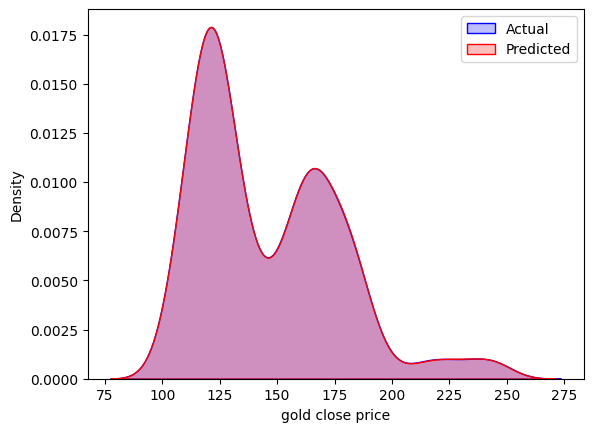

In [8]:
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('gold close price')
plt.ylabel('Density')
plt.legend()
plt.show()

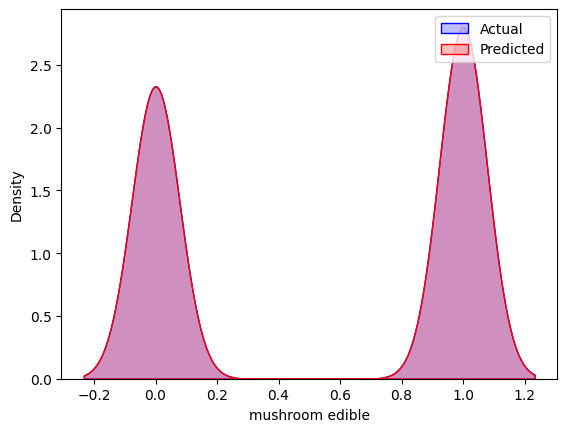

In [9]:
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class, label='Predicted', color='red', fill=True)
plt.xlabel('mushroom edible')
plt.ylabel('Density')
plt.legend()
plt.show()

По итогу получаем очень хорошие значения точности для обоих задач.

# Улучшение бейзлайна задачи классификации

Гипотезы для улучшения бейзлайна классификации: \
- Будем контролировать увеличение числа деревьев `n_estimators`. Может привести к более стабильным оценкам, повышению точности.
- Поменяем `max_depth` - это может предотвратить переобучение.
- Будем так же подбирать `max_features`.

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],          #число деревьев
    'max_depth': [None, 5, 10],           #глубина деревьев
    'max_features': ['sqrt', 'log2']  #выбор признаков
}

model_rf_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=model_rf_tuned,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_class, y_train_class)

print("best:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
predicted_class_tuned = best_model.predict(X_test_class)

print("accuracy:", metrics.accuracy_score(y_test_class, predicted_class_tuned))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


best: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
best score: 0.9888497895821562
accuracy: 0.9915795317849542


Гипотезы не улучшили бейзлайн, но уровень accuracy и так достаточно высок.

# Улучшение бейзлайна задачи регрессии
Теперь перейдем к задаче регрессии. Будем предсказывать charges

Гипотезы по улучшению: \
- Увеличение числа деревьев `n_estimators`
- Ограничение глубины деревьев `max_depth`
- Подбор `max_features`

Таким образом, гипотезы совпадают с задачей классификации

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

model_rf_regr_tuned = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=model_rf_regr_tuned,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_regr, y_train_regr)

print("best:p", grid_search.best_params_)
print("best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
predicted_regr_tuned = best_model.predict(X_test_regr)

print("MSE: ", metrics.mean_squared_error(y_test_regr, predicted_regr_tuned))
print("R2: ", metrics.r2_score(y_test_regr, predicted_regr_tuned))



Fitting 3 folds for each of 16 candidates, totalling 48 fits
best:p {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
best score: 0.9989721107451167
MSE:  0.6406436381072704
R2:  0.9993361905393987


Видно, что улучшения бейзлайна улучшили показатели MSE

# Самостоятельная имплементация решающего дерева для классификации

Определим класс классификатора со всеми необходимыми функциями:

In [12]:
import numpy as np

class MyRandomForestClassifier:
    def __init__(self,
                 n_estimators=10,
                 max_features='sqrt',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []
        self.features_idx = []
        if self.random_state is not None:
            np.random.seed(self.random_state)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def _get_feature_subset_indices(self, n_features):
        if self.max_features == 'sqrt':
            size = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            size = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = int(np.sqrt(n_features))
        indices = np.random.choice(n_features, size=size, replace=False)
        return indices

    class DecisionTree:
        def __init__(self, max_depth, min_samples_split, min_samples_leaf):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.min_samples_leaf = min_samples_leaf
            self.tree = None

        def _gini_impurity(self, y):
            classes, counts = np.unique(y, return_counts=True)
            probabilities = counts / len(y)
            return 1 - np.sum(probabilities ** 2)

        def _split(self, X, y, feature_index, threshold):
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            return (X[left_mask], y[left_mask]), (X[right_mask], y[right_mask])

        def _best_split(self, X, y):
            best_feature, best_threshold, best_gini = None, None, float('inf')
            for feature_index in range(X.shape[1]):
                thresholds = np.unique(X[:, feature_index])
                for threshold in thresholds:
                    (X_left, y_left), (X_right, y_right) = self._split(X, y, feature_index, threshold)
                    if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
                        continue
                    gini = (len(y_left) * self._gini_impurity(y_left) + len(y_right) * self._gini_impurity(y_right)) / len(y)
                    if gini < best_gini:
                        best_feature, best_threshold, best_gini = feature_index, threshold, gini
            return best_feature, best_threshold

        def _build_tree(self, X, y, depth):
            if (len(y) < self.min_samples_split or
                self.max_depth is not None and depth >= self.max_depth or
                len(np.unique(y)) == 1):
                return {'type': 'leaf', 'class': np.argmax(np.bincount(y.astype(int)))}

            best_feature, best_threshold = self._best_split(X, y)
            if best_feature is None:
                return {'type': 'leaf', 'class': np.argmax(np.bincount(y.astype(int)))}

            (X_left, y_left), (X_right, y_right) = self._split(X, y, best_feature, best_threshold)
            return {
                'type': 'node',
                'feature': best_feature,
                'threshold': best_threshold,
                'left': self._build_tree(X_left, y_left, depth + 1),
                'right': self._build_tree(X_right, y_right, depth + 1)
            }


        def fit(self, X, y):
            self.tree = self._build_tree(X, y, depth=0)

        def _predict_one(self, x, node):
            if node['type'] == 'leaf':
                return node['class']
            if x[node['feature']] <= node['threshold']:
                return self._predict_one(x, node['left'])
            else:
                return self._predict_one(x, node['right'])

        def predict(self, X):
            return np.array([self._predict_one(x, self.tree) for x in X])

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_features = X.shape[1]

        for _ in range(self.n_estimators):
            X_boot, y_boot = self._bootstrap_sample(X, y)
            feature_indices = self._get_feature_subset_indices(n_features)
            self.features_idx.append(feature_indices)
            tree = self.DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X_boot[:, feature_indices], y_boot)
            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for tree, f_idx in zip(self.trees, self.features_idx):
            pred = tree.predict(X[:, f_idx])
            predictions.append(pred)
        predictions = np.array(predictions)
        final_pred = []
        for i in range(X.shape[0]):
            vals, counts = np.unique(predictions[:, i], return_counts=True)
            final_pred.append(vals[np.argmax(counts)])
        return np.array(final_pred)


Проведем все те же действия - обучим бейзлайн

accuracy: 0.753770704173221


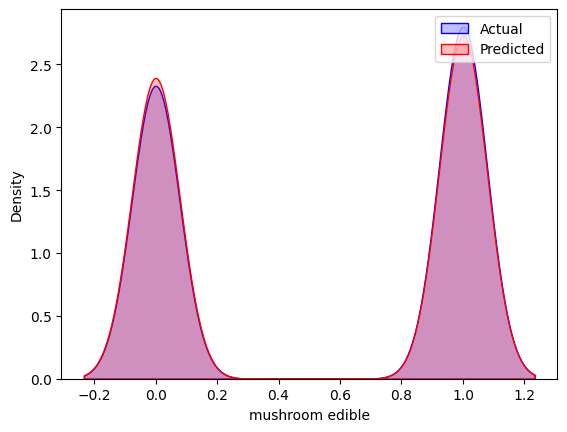

In [13]:
import numpy as np

X = data_class.drop(columns=['class'])
y = data_class['class']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

my_rf_base = MyRandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=42)
my_rf_base.fit(X_train_class, y_train_class)
predicted_class_base = my_rf_base.predict(X_test_class)

print("accuracy:", metrics.accuracy_score(y_test_class, predicted_class_base))

sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class_base, label='Predicted', color='red', fill=True)
plt.xlabel('mushroom edible')
plt.ylabel('Density')
plt.legend()
plt.show()


Видно, что собственная реализация модели имеет не такой высокий уровень accuracy, как модель из sklearn - лишь 0.753770704173221

Применим оптимальные параметры, найденные ранее, в качестве гипотезы оптимизации.

accuracy: 0.753770704173221


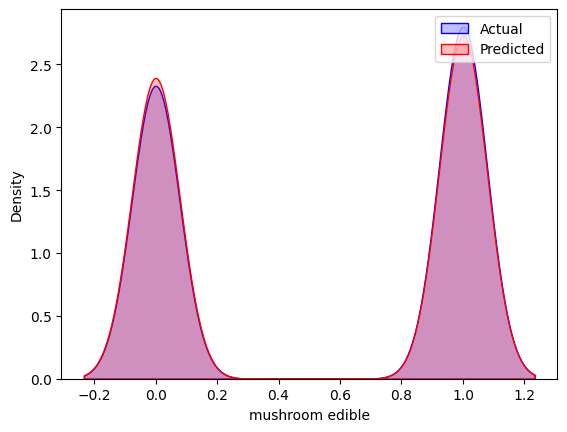

In [15]:
improvs = {
    'n_estimators': 10,
    'max_depth': None,
    'max_features': 'sqrt',
    'random_state': 42
}

my_rf_impr = MyRandomForestClassifier(**improvs)
my_rf_impr.fit(X_train_class, y_train_class)
predicted_class_impr = my_rf_impr.predict(X_test_class)

print("accuracy:", metrics.accuracy_score(y_test_class, predicted_class_impr))

sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class_impr, label='Predicted', color='red', fill=True)
plt.xlabel('mushroom edible')
plt.ylabel('Density')
plt.legend()
plt.show()


Видим, что собственная реализация (после применения гипотез) все же не проявляет ту же точность, что и модель sklearn

# Самостоятельная имплементация решающего дерева для регрессии:

Перейдем к самостоятельной имплементации регрессии. Опишем класс, повторим действия по обучению

In [16]:
import numpy as np

#из lab3
class SimpleDecisionTreeRegressor():
    def __init__(self, max_depth=None, min_samples_leaf=1, criterion='mse'):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if self.criterion not in ['mse']:
            raise NotImplementedError(f"Criterion '{self.criterion}' не реализован. Используйте 'mse'.")

        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree_) for x in X])

    def _build_tree(self, X, y, depth):
        if self.max_depth is not None and depth >= self.max_depth:
            return {'type': 'leaf', 'value': np.mean(y)}

        if len(y) <= self.min_samples_leaf:
            return {'type': 'leaf', 'value': np.mean(y)}

        if np.all(y == y[0]):
            return {'type': 'leaf', 'value': y[0]}

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return {'type': 'leaf', 'value': np.mean(y)}

        left_mask = X[:, best_split['feature']] <= best_split['threshold']
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'type': 'node',
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None

        n_features = X.shape[1]

        current_mse = self._mse(y)

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_mask = X[:, feature] <= t
                right_mask = ~left_mask

                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]

                left_mse = self._mse(left_y)
                right_mse = self._mse(right_y)
                weighted_mse = (len(left_y)*left_mse + len(right_y)*right_mse) / len(y)

                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_split = {
                        'feature': feature,
                        'threshold': t
                    }

        if best_split is None or best_mse >= current_mse:
            return None
        return best_split

    def _mse(self, y):
        mean_y = np.mean(y)
        return np.mean((y - mean_y)**2)

    def _predict_sample(self, x, node):
        if node['type'] == 'leaf':
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'min_samples_leaf': self.min_samples_leaf,
            'criterion': self.criterion
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


class MyRandomForestRegressor:
    def __init__(self,
                 n_estimators=10,
                 max_features='sqrt',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []
        self.features_idx = []
        if self.random_state is not None:
            np.random.seed(self.random_state)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def _get_feature_subset_indices(self, n_features):
        if self.max_features == 'sqrt':
            size = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            size = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = int(np.sqrt(n_features))
        indices = np.random.choice(n_features, size=size, replace=False)
        return indices

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_features = X.shape[1]

        for _ in range(self.n_estimators):
            X_boot, y_boot = self._bootstrap_sample(X, y)
            feature_indices = self._get_feature_subset_indices(n_features)
            self.features_idx.append(feature_indices)

            tree = SimpleDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_leaf=self.min_samples_leaf,
            )
            tree.fit(X_boot[:, feature_indices], y_boot)
            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for tree, f_idx in zip(self.trees, self.features_idx):
            pred = tree.predict(X[:, f_idx])
            predictions.append(pred)
        predictions = np.array(predictions)
        return np.mean(predictions, axis=0)


Обучим бейзлайн модель на собственной реализации случайного леса регрессора:

MSE:  3.4392860161684853
R2: 0.9964363486040518


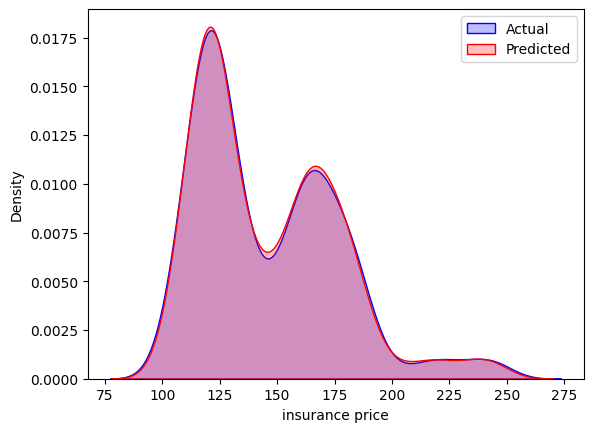

In [17]:
X = data_regr.drop('gold close', axis=1)
y = data_regr['gold close']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_regr = scaler.fit_transform(X_train_regr)
X_test_regr = scaler.transform(X_test_regr)

my_rf_regr_base = MyRandomForestRegressor(n_estimators=10, max_features='sqrt', random_state=42)
my_rf_regr_base.fit(X_train_regr, y_train_regr)
predicted_regr_base = my_rf_regr_base.predict(X_test_regr)

print("MSE: ", metrics.mean_squared_error(y_test_regr, predicted_regr_base))
print("R2:", metrics.r2_score(y_test_regr, predicted_regr_base))

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr_base, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()


Получаем R2 0.9964363486040518, что совсем немного меньше, чем у бейзлайн модели из sklearn. Теперь применим гпиотезы по улучшению

MSE: 2.854887606310973
R2: 0.9970418789959087


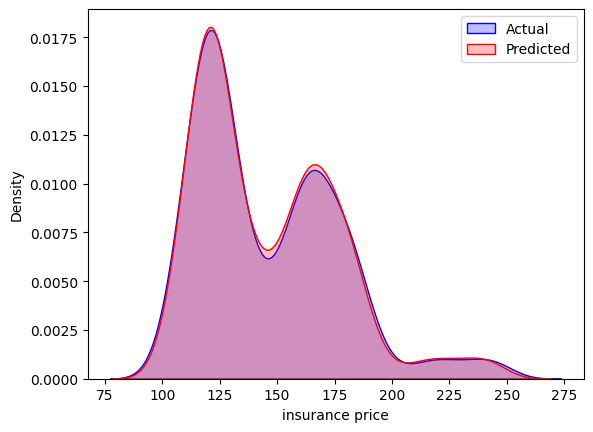

In [18]:
impr = {
    'n_estimators': 30,
    'max_depth': None,
    'max_features': 'sqrt',
    'random_state': 42
}

my_rf_regr_impr = MyRandomForestRegressor(**impr)
my_rf_regr_impr.fit(X_train_regr, y_train_regr)
predicted_regr_impr = my_rf_regr_impr.predict(X_test_regr)

print("MSE:", metrics.mean_squared_error(y_test_regr, predicted_regr_impr))
print("R2:", metrics.r2_score(y_test_regr, predicted_regr_impr))

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr_impr, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()



Видим, что улучшения к небольшому улучшению результата - R2=0.9970418789959087